# Intuition: What is a “sup”?

### 2.1 First, think in simple terms

* **Maximum**: the largest element of a set.
  Example: ${1,2,3}$ has $\max = 3$.

* **Supremum (sup)**: the *least upper bound*.
  This means: the smallest number that is **greater than or equal to** every element of the set.
  *It coincides with the maximum if one exists, but still makes sense when no maximum exists.*

---

### 2.2 Examples

1. **Finite set**
   ${1,2,3}$

   * Largest element = 3
   * Supremum = 3 (same as maximum).

2. **Open interval**
   ${x \in \mathbb{R} : x < 5}$

   * There is no largest element (you can always find something closer to 5).
   * But all numbers are $\leq 5$, and nothing smaller than 5 can bound the set.
   * Supremum = 5.

3. **Unbounded set**
   ${x \in \mathbb{N}}$

   * There is no largest number.
   * No finite number can serve as an upper bound.
   * Supremum = $+\infty$.

---

### 2.3 In optimization

When we write

$$
v^* = \sup\{c^\top x : x \in \mathcal{X}\},
$$

we are saying:

* Collect all objective values $c^\top x$ that are possible.
* Arrange them on the real line.
* The **supremum** is the “best achievable ceiling” of those values.
* If the maximum is attained, $\sup = \max$. If not, the supremum is the limit you can approach but never reach.

# Linear Programming Duality: A Step-by-Step Journey

*From intuitive understanding to mathematical precision*

---

## Part I: Setting the Stage

### 1. Our Starting Problem: The Primal

Imagine you're running a factory that makes different products. You want to **maximize profit**, but you're limited by resources.

**The Mathematical Setup:**
$$
\begin{aligned}
(P)\quad \max_{x \ge 0} \;& c^\top x \\
\text{s.t. } & A x \le b
\end{aligned}
$$

**What each piece means:**
- $x_j$ = how many units of product $j$ to make
- $c_j$ = profit per unit of product $j$
- $c^\top x = \sum_j c_j x_j$ = total profit
- $A_{ij}$ = how much of resource $i$ is needed per unit of product $j$
- $b_i$ = total available amount of resource $i$
- $Ax \le b$ means: "don't use more resources than you have"

**The Challenge:** Those pesky constraints $Ax \le b$ make this hard to solve directly.

---

## Part II: The Big Idea - Remove Constraints by Adding Penalties

### 2. The Lagrangian Philosophy

Instead of saying "you **can't** exceed resource limits," let's say "you **pay a price** for exceeding them."

**Step 1: Introduce Shadow Prices**
- Let $y_i \ge 0$ = the "shadow price" of resource $i$
- Think of $y_i$ as the cost per unit of resource $i$ if you had to buy it

**Step 2: Build the Penalty**
- If $Ax \le b$, no penalty (we're within limits)
- If $Ax > b$, we pay: $y^\top(Ax - b)$ extra cost
- But we want to *subtract* this cost from our profit!

**The Lagrangian:**
$$
L(x,y) = c^\top x - y^\top(Ax - b)
$$

**Intuition Check:** 
- If we stay within constraints ($Ax \le b$), then $Ax - b \le 0$, so $-y^\top(Ax - b) \ge 0$ (bonus!)
- If we violate constraints ($Ax > b$), then $Ax - b > 0$, so $-y^\top(Ax - b) < 0$ (penalty!)

### 3. Algebraic Cleanup

Let's expand and rearrange:
$$
L(x,y) = c^\top x - y^\top A x + y^\top b
$$

Factor out terms:
$$
L(x,y) = y^\top b + x^\top(c - A^\top y)
$$

**Key Insight:** We've separated the Lagrangian into:
- $y^\top b$: depends only on shadow prices
- $x^\top(c - A^\top y)$: shows how profitable each product is after "paying" for resources

---

## Part III: The Dual Function - What's the Best We Can Do?

### 4. Maximizing Over Production Levels

For any fixed shadow prices $y$, ask: **"What's the maximum profit possible?"**

$$
g(y) = \max_{x \ge 0} L(x,y) = \max_{x \ge 0} \left[ y^\top b + x^\top(c - A^\top y) \right]
$$

Since the first term doesn't involve $x$:
$$
g(y) = y^\top b + \max_{x \ge 0} x^\top(c - A^\top y)
$$

### 5. When Does This Maximum Exist?

Look at the term $\max_{x \ge 0} x^\top(c - A^\top y) = \max_{x \ge 0} \sum_j x_j (c_j - (A^\top y)_j)$.

**Think about each product $j$ separately:**

- If $c_j - (A^\top y)_j > 0$: Product $j$ is profitable after paying for resources
  → We'd want to make $x_j = +\infty$ units
  → The maximum is $+\infty$

- If $c_j - (A^\top y)_j < 0$: Product $j$ loses money after paying for resources
  → We'd set $x_j = 0$

- If $c_j - (A^\top y)_j = 0$: Product $j$ breaks even
  → Any $x_j \ge 0$ gives the same contribution (zero)

**The Crucial Condition:**
For $g(y)$ to be finite, we need $c_j - (A^\top y)_j \le 0$ for all $j$.

In matrix form: $c - A^\top y \le 0$, or equivalently: $A^\top y \ge c$.

### 6. The Dual Function Formula

When $A^\top y \ge c$, all products are either unprofitable or break-even, so we set $x = 0$:

$$
g(y) = y^\top b + 0 = y^\top b
$$

When $A^\top y \not\ge c$, some product is too profitable, so $g(y) = +\infty$.

**Summary:**
$$
g(y) = \begin{cases}
y^\top b & \text{if } A^\top y \ge c \text{ and } y \ge 0 \\
+\infty & \text{otherwise}
\end{cases}
$$

---

## Part IV: The Dual Problem - Finding the Tightest Bound

### 7. The Dual Problem Emerges

We know that for feasible primal $x$: $c^\top x \le g(y)$ (this comes from the definition of $g$).

So $g(y)$ gives us **upper bounds** on the primal optimum. We want the **tightest** (smallest) such bound:

$$
\begin{aligned}
(D)\quad \min_{y \ge 0} &\;\; y^\top b \\
\text{s.t. } & A^\top y \ge c
\end{aligned}
$$

**Economic Interpretation:**
- $y_i$ = shadow price of resource $i$
- $y^\top b$ = total cost of all resources at these prices
- Constraint $A^\top y \ge c$ means: at these prices, no product is profitable to produce

---

## Part V: The Beautiful Theory

### 8. Weak Duality - Why Primal ≤ Dual Always

**Theorem:** For any feasible $x$ (primal) and $y$ (dual): $c^\top x \le b^\top y$.

**Proof by Pure Logic:**
- $x$ is primal feasible: $Ax \le b$ and $x \ge 0$
- $y$ is dual feasible: $A^\top y \ge c$ and $y \ge 0$

Chain of inequalities:
$$
c^\top x \le (A^\top y)^\top x = y^\top A x \le y^\top b
$$

**Explanation:**
1. $c^\top x \le (A^\top y)^\top x$ because $c \le A^\top y$ and $x \ge 0$
2. $y^\top A x \le y^\top b$ because $Ax \le b$ and $y \ge 0$

**Intuition:** The profit can't exceed what you'd pay for resources at fair market prices.

### 9. Strong Duality - The LP Miracle

**Theorem:** If the primal is feasible and bounded, then:
$$
\max(P) = \min(D)
$$

**Why This is Amazing:** In most optimization problems, there's a gap between primal and dual. But in linear programming, **the gap closes completely**!

This is what makes LP so computationally tractable and economically meaningful.

### 10. Complementary Slackness - The Bridge Between Solutions

At optimal solutions $x^*$ and $y^*$:

$$
\begin{aligned}
y_i^* (b_i - \sum_j A_{ij} x_j^*) &= 0 \quad \text{for all } i \\
x_j^* (\sum_i A_{ij} y_i^* - c_j) &= 0 \quad \text{for all } j
\end{aligned}
$$

**Intuitive Meaning:**

**Resource Complementary Slackness:**
- If resource $i$ has leftover capacity ($\sum_j A_{ij} x_j^* < b_i$), then $y_i^* = 0$
- *"Abundant resources have zero shadow price"*

**Product Complementary Slackness:**
- If we produce product $j$ ($x_j^* > 0$), then $\sum_i A_{ij} y_i^* = c_j$
- *"Products we make must break even at shadow prices"*

---

## Part VI: The Big Picture

### 11. Geometric Intuition

**Primal View:** Move a profit hyperplane $c^\top x =$ constant outward until it just touches the feasible region.

**Dual View:** Move a cost hyperplane $y^\top b =$ constant inward until it just touches the dual feasible region.

**Strong Duality:** These hyperplanes meet at exactly the same value!

### 12. Economic Story

The dual problem is asking: **"What's the minimum you'd sell your resources for?"**

- If someone offered to buy resource $i$ at price $y_i$, you'd get $y^\top b$ total
- But you'd only sell if this beats your maximum possible profit from production
- The constraint $A^\top y \ge c$ ensures no product would be profitable at these resource prices
- Strong duality says: the minimum selling price equals maximum production profit

### 13. Algorithmic Significance

**Simplex Method:** Simultaneously solves primal and dual, using complementary slackness to jump between vertices.

**Interior Point Methods:** Move through the interior of both primal and dual feasible regions, maintaining weak duality until convergence.

---

## ✅ Key Takeaways

1. **Lagrangian** = remove constraints by adding penalties
2. **Dual function** = maximize Lagrangian over primal variables  
3. **Finiteness condition** = prevents unbounded profit from any single product
4. **Dual problem** = minimize the upper bound
5. **Weak duality** = primal profit ≤ dual cost (always)
6. **Strong duality** = equality at optimum (LP magic!)
7. **Complementary slackness** = unused resources are free, produced goods break even
8. **Economic meaning** = shadow prices reflect true resource values

The beauty of LP duality lies in this perfect symmetry: every primal constraint becomes a dual variable, every primal variable becomes a dual constraint, and the optimum values are identical.

---

# Numerical Example: Primal vs Dual

## 1. The Primal Problem

Suppose we produce two products $x_1, x_2$.

* Profit per unit: $c = (3, 2)$
* Resources:

  * Resource 1: $2x_1 + x_2 \le 4$
  * Resource 2: $x_1 + 2x_2 \le 5$
* Nonnegativity: $x_1, x_2 \ge 0$

So the primal is:

$$
\begin{aligned}
(P)\quad \max \;& 3x_1 + 2x_2 \\
\text{s.t. } & 2x_1 + x_2 \le 4 \\
& x_1 + 2x_2 \le 5 \\
& x_1, x_2 \ge 0.
\end{aligned}
$$

---

## 2. The Dual Problem

We follow the recipe:

* Dual variables $y_1, y_2 \ge 0$ (shadow prices for each constraint).
* Objective: minimize $b^\top y = 4y_1 + 5y_2$.
* Constraints: $A^\top y \ge c$.

Matrix check:

$$
A =
\begin{bmatrix}
2 & 1 \\
1 & 2
\end{bmatrix},
\quad
c = \begin{bmatrix} 3 \\ 2 \end{bmatrix},
\quad
b = \begin{bmatrix} 4 \\ 5 \end{bmatrix}.
$$

So:

$$
(D)\quad \min \; 4y_1 + 5y_2
$$

subject to

$$
\begin{aligned}
2y_1 + y_2 &\ge 3 \quad &\text{(for $x_1$)} \\
y_1 + 2y_2 &\ge 2 \quad &\text{(for $x_2$)} \\
y_1, y_2 &\ge 0.
\end{aligned}
$$

---

## 3. Solve the Primal (Graphically)

Constraints:

1. $2x_1 + x_2 \le 4$ → line $x_2 = 4 - 2x_1$
2. $x_1 + 2x_2 \le 5$ → line $x_2 = (5 - x_1)/2$

Feasible region = polygon bounded by axes and these lines.

Candidate corner points:

* $(0,0)$,
* $(0,2.5)$ from second constraint,
* $(2,0)$ from first constraint,
* Intersection of $2x_1 + x_2 = 4$ and $x_1 + 2x_2 = 5$.

Solve intersection:

$$
\begin{aligned}
2x_1 + x_2 &= 4 \\
x_1 + 2x_2 &= 5
\end{aligned}
$$

From first: $x_2 = 4 - 2x_1$.
Plug into second: $x_1 + 2(4 - 2x_1) = 5 \implies x_1 + 8 - 4x_1 = 5$.

So $-3x_1 = -3 \implies x_1 = 1$, and $x_2 = 2$.

Thus intersection point = $(1,2)$.

---

## 4. Evaluate Objective at Corners

* $(0,0)$ → $3(0)+2(0) = 0$
* $(2,0)$ → $3(2)+2(0) = 6$
* $(0,2.5)$ → $3(0)+2(2.5) = 5$
* $(1,2)$ → $3(1)+2(2) = 3+4=7$

**Primal optimum: $\max = 7$ at $(x_1,x_2) = (1,2)$.**

---

## 5. Solve the Dual

Dual constraints:

1. $2y_1 + y_2 \ge 3$
2. $y_1 + 2y_2 \ge 2$
3. $y_1,y_2 \ge 0$

We minimize $4y_1 + 5y_2$.

Graphically: feasible region = intersection of half-planes above these lines.
The optimum occurs at an intersection.

Check intersection of equalities:

$$
\begin{aligned}
2y_1 + y_2 &= 3 \\
y_1 + 2y_2 &= 2
\end{aligned}
$$

From second: $y_1 = 2 - 2y_2$.
Plug into first: $2(2 - 2y_2) + y_2 = 3 \implies 4 - 4y_2 + y_2 = 3$.

So $-3y_2 = -1 \implies y_2 = 1/3$, $y_1 = 2 - 2/3 = 4/3$.

Objective: $4(4/3) + 5(1/3) = 16/3 + 5/3 = 21/3 = 7$.

**Dual optimum: $\min = 7$ at $(y_1,y_2) = (4/3, 1/3)$.**

---

## 6. Strong Duality Check

* Primal optimum = **7**
* Dual optimum = **7**

They match! Strong duality in action.

---

## 7. Complementary Slackness

Check conditions:

1. Constraint $2x_1 + x_2 \le 4$:
   At $(1,2)$ → $2(1)+2=4$ = tight.
   $y_1 = 4/3 > 0$. ✓

2. Constraint $x_1 + 2x_2 \le 5$:
   At $(1,2)$ → $1+4=5$ = tight.
   $y_2 = 1/3 > 0$. ✓

So all conditions align perfectly.

---

## 8. Intuition

* **Primal**: max profit by choosing products $(1,2)$ → profit = 7.
* **Dual**: assign prices to resources $(y_1=4/3, y_2=1/3)$ → minimum total resource bill = 7.
* The profit you can extract = the bill you’d have to pay.
* Market clears exactly at equilibrium.

---

👉 This little $2\times 2$ example shows every step:

* Constructing primal & dual,
* Solving both,
* Verifying weak + strong duality,
* Checking complementary slackness.

('lp_duality_primal.png', 'lp_duality_dual.png')

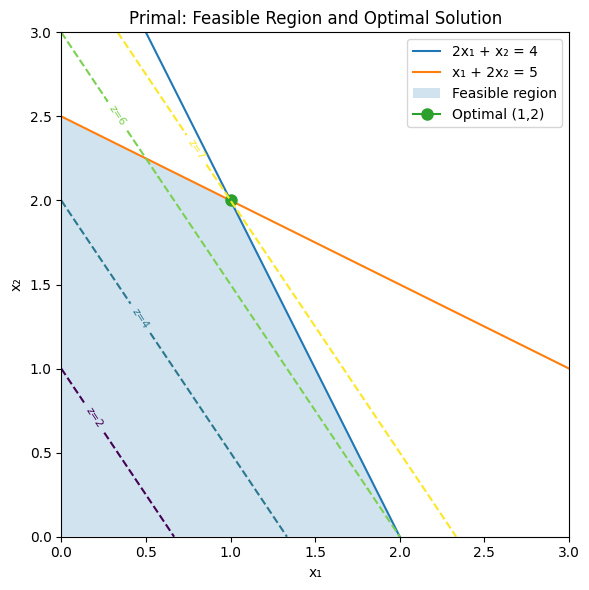

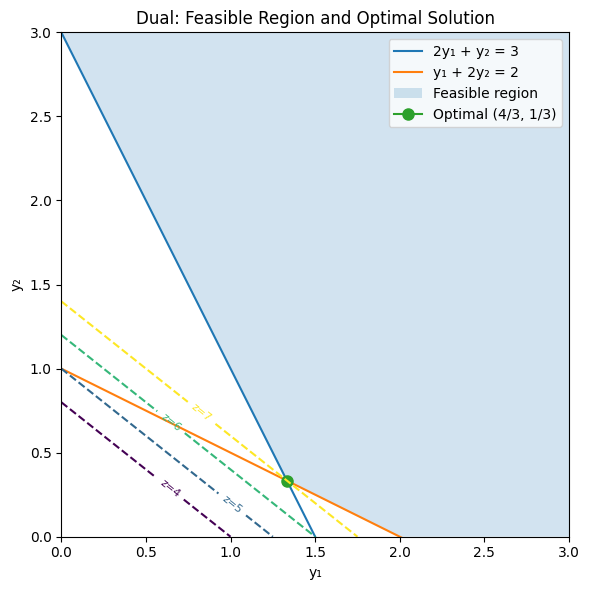

In [1]:
# Plot primal and dual feasible regions with optimal points and objective contours.
# Requirements: matplotlib only, one chart per figure, no explicit color settings.

import numpy as np
import matplotlib.pyplot as plt

# -------- PRIMAL PROBLEM --------
# Maximize 3x1 + 2x2
# s.t.
#   2x1 + x2 <= 4
#   x1 + 2x2 <= 5
#   x1 >= 0, x2 >= 0

# Create grid
x1 = np.linspace(0, 3, 400)
x2_line1 = 4 - 2*x1           # x2 = 4 - 2x1
x2_line2 = (5 - x1) / 2       # x2 = (5 - x1)/2

# Feasible region boundaries (clip negatives)
x2_line1_clipped = np.maximum(0, x2_line1)
x2_line2_clipped = np.maximum(0, x2_line2)

# Compute intersection
# Solve:
# 2x1 + x2 = 4
# x1 + 2x2 = 5
# -> x1 = 1, x2 = 2
x1_opt_p, x2_opt_p = 1.0, 2.0

# Prepare figure for primal
fig1 = plt.figure(figsize=(6,6))
ax1 = plt.gca()

# Plot axes limits
ax1.set_xlim(0, 3)
ax1.set_ylim(0, 3)

# Plot constraint lines
ax1.plot(x1, x2_line1, label='2x₁ + x₂ = 4')
ax1.plot(x1, x2_line2, label='x₁ + 2x₂ = 5')

# Feasible polygon vertices in order: (0,0), (0,2.5), (1,2), (2,0)
poly_primal = np.array([
    [0.0, 0.0],
    [0.0, 2.5],
    [1.0, 2.0],
    [2.0, 0.0]
])

# Fill feasible region (default color)
ax1.fill(poly_primal[:,0], poly_primal[:,1], alpha=0.2, label='Feasible region')

# Plot optimal point
ax1.plot([x1_opt_p], [x2_opt_p], marker='o', markersize=8, label='Optimal (1,2)')

# Objective contours: 3x1 + 2x2 = const
# Show a few iso-profit lines
levels = [2, 4, 6, 7]
X1, X2 = np.meshgrid(np.linspace(0,3,200), np.linspace(0,3,200))
Z = 3*X1 + 2*X2
CS = ax1.contour(X1, X2, Z, levels=levels, linestyles='--')
ax1.clabel(CS, inline=True, fontsize=8, fmt=lambda v: f"z={int(v)}")

ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂')
ax1.set_title('Primal: Feasible Region and Optimal Solution')
ax1.legend(loc='upper right')

primal_path = 'lp_duality_primal.png'
plt.tight_layout()
plt.savefig(primal_path, dpi=150)

# -------- DUAL PROBLEM --------
# Minimize 4y1 + 5y2
# s.t.
#   2y1 + y2 >= 3
#   y1 + 2y2 >= 2
#   y1, y2 >= 0

# Create grid for plotting half-planes
y1 = np.linspace(0, 3, 400)
y2_bound1 = 3 - 2*y1   # y2 >= 3 - 2y1
y2_bound2 = (2 - y1)/2 # y2 >= 1 - 0.5y1

# Intersection point where equalities meet -> (4/3, 1/3)
y1_opt_d, y2_opt_d = 4/3, 1/3

fig2 = plt.figure(figsize=(6,6))
ax2 = plt.gca()
ax2.set_xlim(0, 3)
ax2.set_ylim(0, 3)

# Plot boundary lines as equalities
ax2.plot(y1, 3 - 2*y1, label='2y₁ + y₂ = 3')
ax2.plot(y1, 1 - 0.5*y1, label='y₁ + 2y₂ = 2')

# Build a polygon that approximates the feasible region in the box [0,3]x[0,3]
# Feasible region is intersection of half-planes above both lines and the nonnegative quadrant.
# We'll sample along y1 and take the max of the two lower bounds and 0.
yy = np.maximum(0, np.maximum(y2_bound1, y2_bound2))
# To form a polygon for fill: go along y1 increasing with yy as lower boundary to top (here top=3),
# but since it's unbounded upward, we clip at plot limit y2=3 and close with borders.
# Construct polygon: left edge up, top edge right, right edge down to boundary, boundary back to left.
poly_y1 = [0.0, 0.0, 3.0, 3.0]
poly_y2 = [3.0, 0.0, 0.0, 3.0]  # start with box, then overwrite interior with boundary fill

# Instead, create a more accurate feasible shape within the plotting window:
# Collect points along the boundary curve (y1, max(0, max(b1, b2))) and the top/border to close.
Y1_pts = list(y1)
Y2_pts = list(np.clip(yy, 0, 3))

# Close polygon by adding corners along the bounding box where necessary:
# Go up to top edge from last point, then left to x=0, then back down to initial yy at y1=0.
# Last sampled point:
last_y1 = Y1_pts[-1]
last_y2 = Y2_pts[-1]
# Add (last_y1, 3), (0,3), (0, Y2_pts[0])
Y1_poly = Y1_pts + [last_y1, 0.0, 0.0]
Y2_poly = Y2_pts + [3.0, 3.0, Y2_pts[0]]

ax2.fill(Y1_poly, Y2_poly, alpha=0.2, label='Feasible region')

# Plot optimal point
ax2.plot([y1_opt_d], [y2_opt_d], marker='o', markersize=8, label='Optimal (4/3, 1/3)')

# Objective contours for 4y1 + 5y2 = const; we minimize, so lower lines are better
Y1g, Y2g = np.meshgrid(np.linspace(0,3,200), np.linspace(0,3,200))
Zg = 4*Y1g + 5*Y2g
levels_d = [4, 5, 6, 7]
CS2 = ax2.contour(Y1g, Y2g, Zg, levels=levels_d, linestyles='--')
ax2.clabel(CS2, inline=True, fontsize=8, fmt=lambda v: f"z={int(v)}")

ax2.set_xlabel('y₁')
ax2.set_ylabel('y₂')
ax2.set_title('Dual: Feasible Region and Optimal Solution')
ax2.legend(loc='upper right')

dual_path = 'lp_duality_dual.png'
plt.tight_layout()
plt.savefig(dual_path, dpi=150)

(primal_path, dual_path)


'lp_duality_combined_one_axes.png'

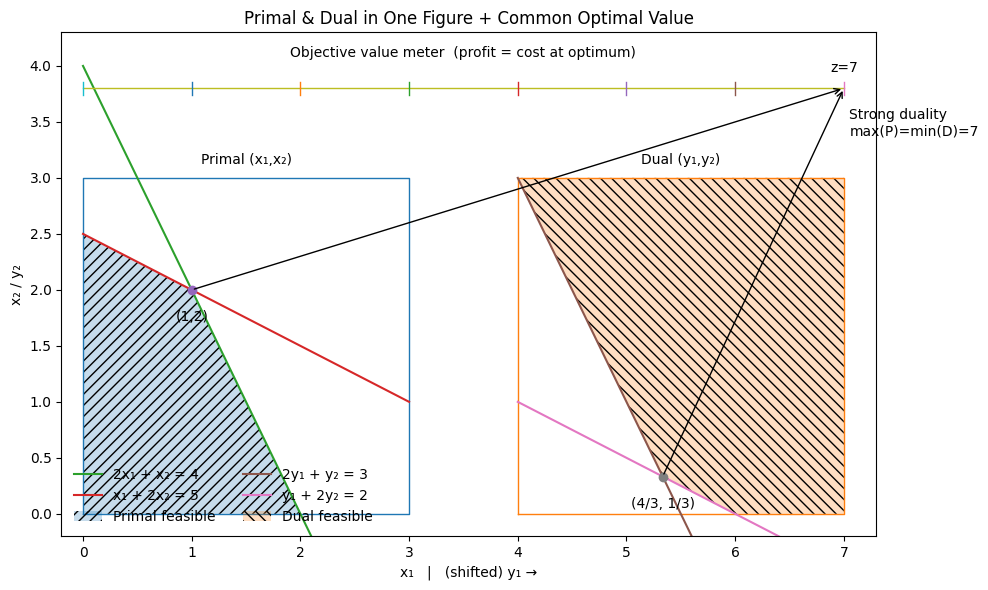

In [6]:
# Single-axes combined plot showing both primal and dual feasible regions
# in one figure (no subplots), with a shared "objective meter" indicating z=7
# and arrows from both optima to the same optimal value.
#
# Requirements respected:
# - One chart per figure (single axes)
# - Use matplotlib, no seaborn
# - Do not set any explicit colors (use defaults); we differentiate with hatching

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = plt.gca()

# Panel boxes (for visual separation, drawn with rectangles)
# Primal panel: x in [0,3], y in [0,3]
# Dual panel: shift x by +4 -> y1' = y1 + 4, x in [4,7], y in [0,3]
ax.plot([0,3,3,0,0], [0,0,3,3,0], linewidth=1)        # primal box
ax.text(1.5, 3.1, "Primal (x₁,x₂)", ha='center', va='bottom')

ax.plot([4,7,7,4,4], [0,0,3,3,0], linewidth=1)        # dual box
ax.text(5.5, 3.1, "Dual (y₁,y₂)", ha='center', va='bottom')

# ----- PRIMAL region and constraints -----
x1 = np.linspace(0, 3, 400)
x2_line1 = 4 - 2*x1               # 2x1 + x2 = 4
x2_line2 = (5 - x1)/2             # x1 + 2x2 = 5

# Plot boundary lines inside the primal box
ax.plot(x1, x2_line1, label='2x₁ + x₂ = 4')
ax.plot(x1, x2_line2, label='x₁ + 2x₂ = 5')

# Feasible polygon vertices: (0,0), (0,2.5), (1,2), (2,0)
poly_primal = np.array([[0.0,0.0],[0.0,2.5],[1.0,2.0],[2.0,0.0]])
ax.fill(poly_primal[:,0], poly_primal[:,1], alpha=0.25, hatch='///', label='Primal feasible')

# Optimal primal point (1,2)
x1_opt_p, x2_opt_p = 1.0, 2.0
ax.plot([x1_opt_p], [x2_opt_p], marker='o')
ax.text(x1_opt_p, x2_opt_p-0.18, "(1,2)", ha='center', va='top')

# ----- DUAL region and constraints (shifted) -----
y1 = np.linspace(0, 3, 400)
y2_eq1 = 3 - 2*y1                 # 2y1 + y2 = 3
y2_eq2 = 1 - 0.5*y1               # y1 + 2y2 = 2

# Shift x by +4 for dual panel
y1s = y1 + 4

# Plot boundary lines
ax.plot(y1s, y2_eq1, label='2y₁ + y₂ = 3')
ax.plot(y1s, y2_eq2, label='y₁ + 2y₂ = 2')

# Feasible region (intersection above both lines, y>=0), clipped to box
y2_lb = np.maximum(0, np.maximum(y2_eq1, y2_eq2))
ax.fill(np.r_[y1s, y1s[::-1]], np.r_[y2_lb, np.full_like(y2_lb, 3)][::-1], alpha=0.25, hatch='\\\\\\', label='Dual feasible')

# Optimal dual point (4/3, 1/3) shifted
y1_opt_d, y2_opt_d = 4/3, 1/3
ax.plot([y1_opt_d+4], [y2_opt_d], marker='o')
ax.text(y1_opt_d+4, y2_opt_d-0.18, "(4/3, 1/3)", ha='center', va='top')

# ----- Objective meter (top) showing z=7 for both -----
# Draw a number line from x=0 to x=7 at y=3.8 (above panels)
y_meter = 3.8
ax.plot([0,7], [y_meter, y_meter], linewidth=1)
for t in range(0,8):
    ax.plot([t, t], [y_meter-0.06, y_meter+0.06], linewidth=1)
ax.text(7, y_meter+0.12, "z=7", ha='center', va='bottom')
ax.text(3.5, y_meter+0.25, "Objective value meter  (profit = cost at optimum)", ha='center', va='bottom')

# Arrows from both optima up to z=7 on the meter
ax.annotate("", xy=(7, y_meter), xytext=(x1_opt_p, x2_opt_p), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(7, y_meter), xytext=(y1_opt_d+4, y2_opt_d), arrowprops=dict(arrowstyle="->"))
ax.text(7.05, y_meter-0.18, "Strong duality\nmax(P)=min(D)=7", va='top')

# Aesthetics
ax.set_xlim(-0.2, 7.3)
ax.set_ylim(-0.2, 4.3)
ax.set_xlabel("x₁   |   (shifted) y₁ →")
ax.set_ylabel("x₂ / y₂")
ax.set_title("Primal & Dual in One Figure + Common Optimal Value")
ax.legend(loc='lower left', ncol=2, frameon=False)

combined_path = "lp_duality_combined_one_axes.png"
plt.tight_layout()
plt.savefig(combined_path, dpi=150)

combined_path


COMPREHENSIVE LINEAR PROGRAMMING DUALITY ANALYSIS

=== LAGRANGIAN DERIVATION OF DUAL PROBLEM ===

Step 1: Primal Problem
maximize:
[5.0⋅x₁ + 3.0⋅x₂ + 2.0⋅x₃]
subject to:
⎡2.0⋅x₁ + 1.0⋅x₂ + 1.0⋅x₃⎤   ⎡20.0⎤
⎢                        ⎥   ⎢    ⎥
⎢1.0⋅x₁ + 3.0⋅x₂ + 2.0⋅x₃⎥   ⎢30.0⎥
⎢                        ⎥ = ⎢    ⎥
⎢1.0⋅x₁ + 1.0⋅x₂ + 3.0⋅x₃⎥   ⎢40.0⎥
⎢                        ⎥   ⎢    ⎥
⎣    1.0⋅x₁ + 1.0⋅x₃     ⎦   ⎣15.0⎦
           x >= 0

Step 2: Lagrangian Function
L(x,y) =
5.0⋅x₁ + 3.0⋅x₂ + 2.0⋅x₃ - y₁⋅(2.0⋅x₁ + 1.0⋅x₂ + 1.0⋅x₃ - 20.0) - y₂⋅(1.0⋅x₁ + ↪

↪  3.0⋅x₂ + 2.0⋅x₃ - 30.0) - y₃⋅(1.0⋅x₁ + 1.0⋅x₂ + 3.0⋅x₃ - 40.0) - y₄⋅(1.0⋅x₁ ↪

↪  + 1.0⋅x₃ - 15.0)

Step 3: Rearranging Lagrangian
L(x,y) =
x₁⋅(-2.0⋅y₁ - 1.0⋅y₂ - 1.0⋅y₃ - 1.0⋅y₄ + 5.0) + x₂⋅(-1.0⋅y₁ - 3.0⋅y₂ - 1.0⋅y₃  ↪

↪ + 3.0) + x₃⋅(-1.0⋅y₁ - 2.0⋅y₂ - 3.0⋅y₃ - 1.0⋅y₄ + 2.0) + 20.0⋅y₁ + 30.0⋅y₂ + ↪

↪  40.0⋅y₃ + 15.0⋅y₄

Step 4: Dual Function
g(y) = sup_x L(x,y)
For g(y) to be finite, we need:
c - A^T y <= 0, i.e.,
⎡2.0⋅y₁ + 1.0⋅y

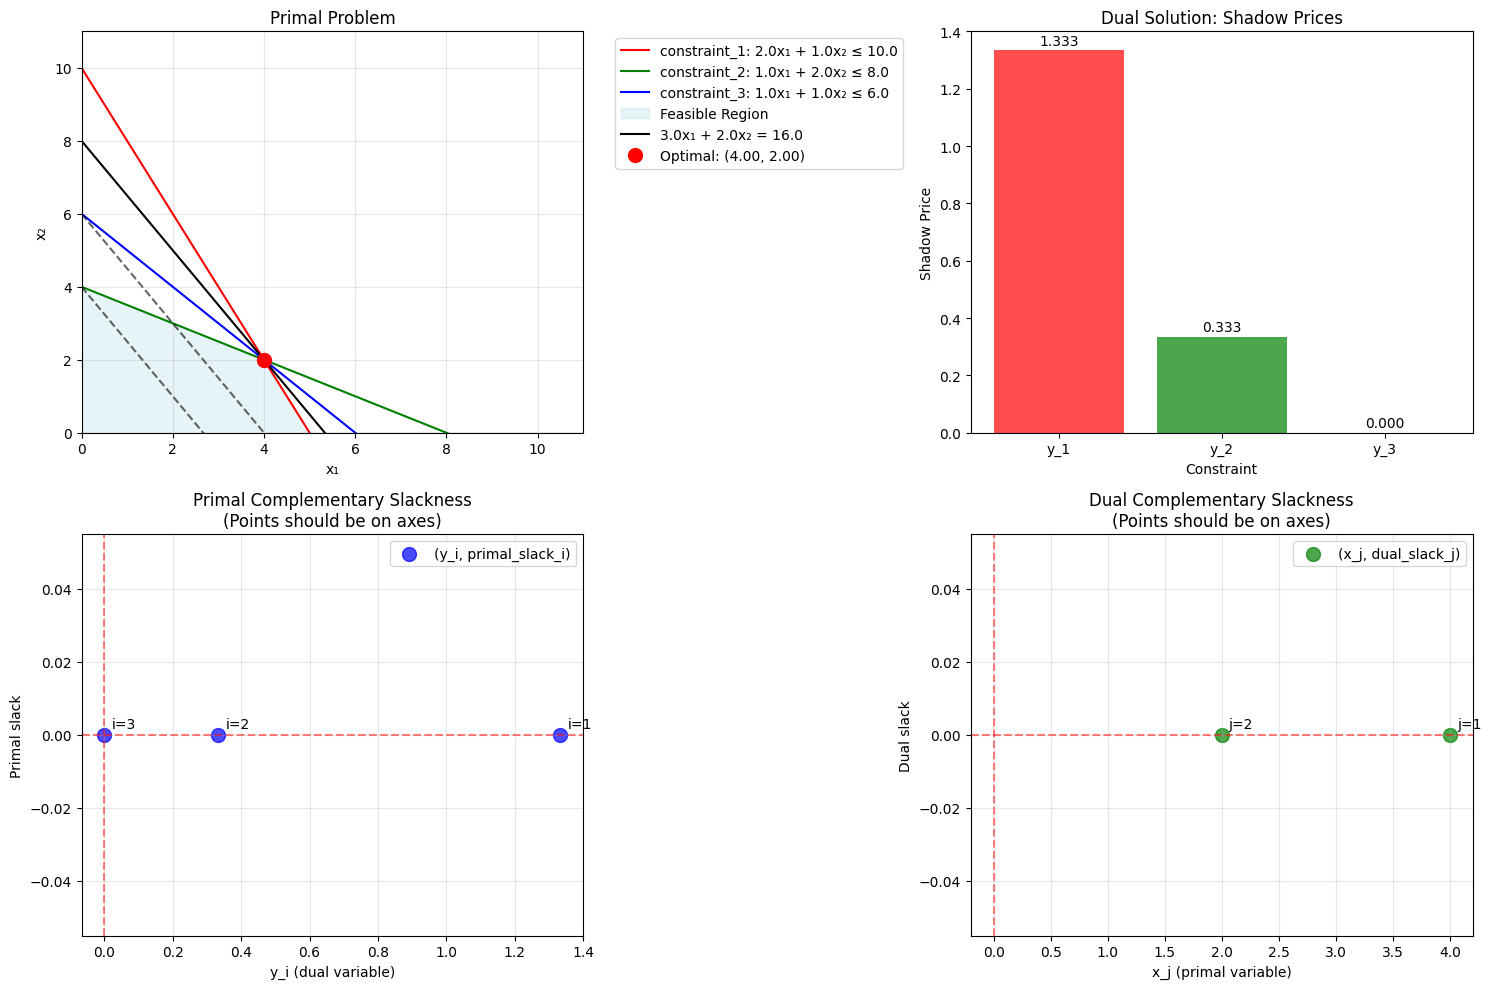


Performing parametric analysis on RHS...
=== PARAMETRIC ANALYSIS ===
Varying rhs parameter 0 over range [ 4.          4.42105263  4.84210526  5.26315789  5.68421053  6.10526316
  6.52631579  6.94736842  7.36842105  7.78947368  8.21052632  8.63157895
  9.05263158  9.47368421  9.89473684 10.31578947 10.73684211 11.15789474
 11.57894737 12.        ]



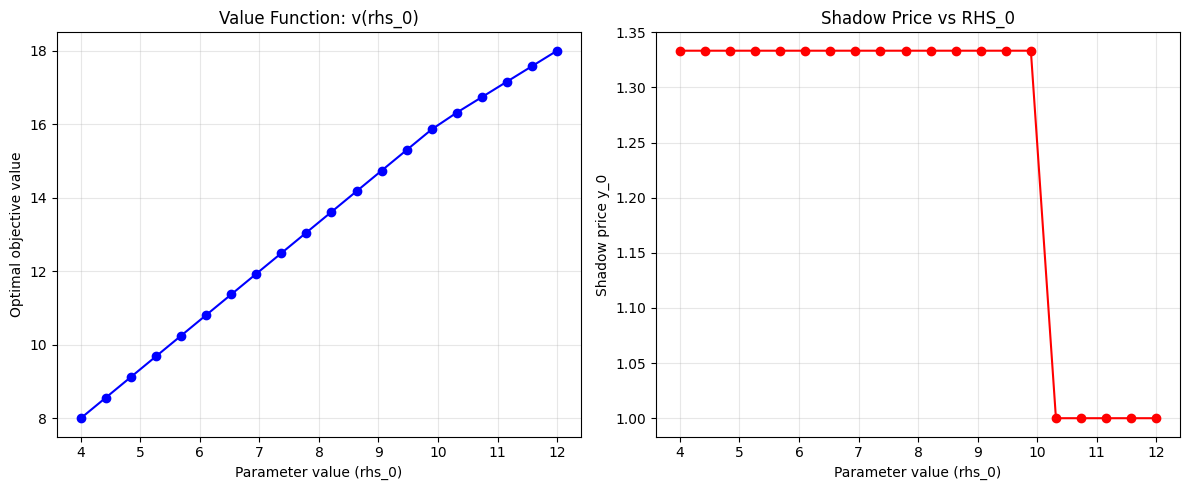


ADVANCED THEORETICAL CONCEPTS

1. FARKAS' LEMMA APPLICATION
----------------------------------------
Farkas' Lemma: For matrix A and vector c, exactly one holds:
  (i)  ∃x ≥ 0: Ax = c
  (ii) ∃y: A^T y ≥ 0, c^T y < 0

This provides the theoretical foundation for LP duality.

2. STRONG DUALITY CONDITIONS
----------------------------------------
Strong duality holds when:
  • Primal is feasible and bounded
  • Dual is feasible and bounded
  • Slater's condition is satisfied (for LP, always true)

3. GEOMETRIC INTERPRETATION
----------------------------------------
Primal: Find point in polytope maximizing linear function
Dual: Find hyperplane separating polytope from higher objective contours
Optimal value: Point where separation is tightest

4. ALGORITHMIC IMPLICATIONS
----------------------------------------
• Simplex method: Move between vertices of primal polytope
• Dual simplex: Move between vertices of dual polytope
• Interior point: Follow central path in primal-dual space
• Cutti

In [2]:
import numpy as np
from scipy.optimize import linprog
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
from sympy import symbols, Matrix, solve, simplify

class AdvancedLPDuality:
    """
    Advanced Linear Programming Duality Analysis
    Includes Lagrangian derivation, sensitivity analysis, and theoretical verification
    """
    
    def __init__(self, c, A_ub, b_ub, variable_names=None, constraint_names=None):
        """
        Initialize LP problem: maximize c^T x subject to Ax <= b, x >= 0
        
        Parameters:
        -----------
        c : array-like
            Objective coefficients
        A_ub : array-like  
            Inequality constraint matrix
        b_ub : array-like
            Right-hand side vector
        variable_names : list, optional
            Names for primal variables
        constraint_names : list, optional
            Names for constraints
        """
        self.c = np.array(c, dtype=float)
        self.A = np.array(A_ub, dtype=float)
        self.b = np.array(b_ub, dtype=float)
        self.m, self.n = self.A.shape
        
        self.variable_names = variable_names or [f'x_{i+1}' for i in range(self.n)]
        self.constraint_names = constraint_names or [f'constraint_{i+1}' for i in range(self.m)]
        
        # Store solutions
        self.primal_solution = None
        self.dual_solution = None
        self.is_solved = False
            
    def lagrangian_derivation_symbolic(self):
        """
        Symbolic derivation of dual problem using Lagrangian method
        """
        print("=== LAGRANGIAN DERIVATION OF DUAL PROBLEM ===\n")
        
        # Define symbolic variables
        x = sp.Matrix([symbols(f'x_{i+1}') for i in range(self.n)])
        y = sp.Matrix([symbols(f'y_{i+1}') for i in range(self.m)])
        
        c_sym = sp.Matrix(self.c)
        A_sym = sp.Matrix(self.A)
        b_sym = sp.Matrix(self.b)
        
        print("Step 1: Primal Problem")
        print("maximize:")
        sp.pprint(c_sym.T @ x)
        print("subject to:")
        sp.pprint(sp.Eq(A_sym @ x, b_sym, evaluate=False))  # Show as ≤ conceptually
        print("           x >= 0\n")
        
        print("Step 2: Lagrangian Function")
        L = c_sym.T @ x - y.T @ (A_sym @ x - b_sym)
        L_simplified = simplify(L[0])
        print("L(x,y) =")
        sp.pprint(L_simplified)
        print()
        
        print("Step 3: Rearranging Lagrangian")
        L_rearranged = b_sym.T @ y + x.T @ (c_sym - A_sym.T @ y)
        print("L(x,y) =")
        sp.pprint(L_rearranged[0])
        print()
        
        print("Step 4: Dual Function")
        print("g(y) = sup_x L(x,y)")
        print("For g(y) to be finite, we need:")
        dual_constraint = c_sym - A_sym.T @ y
        print("c - A^T y <= 0, i.e.,")
        sp.pprint(sp.Ge(A_sym.T @ y, c_sym, evaluate=False))
        print("And g(y) =")
        sp.pprint(b_sym.T @ y)
        print()
        
        print("Step 5: Dual Problem")
        print("minimize:")
        sp.pprint(b_sym.T @ y)
        print("subject to:")
        sp.pprint(sp.Ge(A_sym.T @ y, c_sym, evaluate=False))
        print("           y >= 0\n")
        
        return L_simplified
    
    def solve_both_problems(self, method='highs', verbose=False):
        """
        Solve both primal and dual problems
        """
        # Solve primal (convert to minimization for scipy)
        primal_result = linprog(
            -self.c,  # Negate for maximization
            A_ub=self.A,
            b_ub=self.b,
            bounds=[(0, None)] * self.n,
            method=method
        )
        
        # Solve dual
        dual_result = linprog(
            self.b,
            A_ub=-self.A.T,  # A^T y >= c becomes -A^T y <= -c
            b_ub=-self.c,
            bounds=[(0, None)] * self.m,
            method=method
        )
        
        if primal_result.success and dual_result.success:
            self.primal_solution = {
                'x': primal_result.x,
                'objective': -primal_result.fun,  # Convert back to maximization
                'slack': primal_result.slack if hasattr(primal_result, 'slack') else None
            }
            
            self.dual_solution = {
                'y': dual_result.x,
                'objective': dual_result.fun,
                'slack': dual_result.slack if hasattr(dual_result, 'slack') else None
            }
            
            self.is_solved = True
            
            if verbose:
                print("=== SOLUTION SUMMARY ===")
                print(f"Primal optimal: x* = {self.primal_solution['x']}")
                print(f"Primal objective: {self.primal_solution['objective']:.6f}")
                print(f"Dual optimal: y* = {self.dual_solution['y']}")
                print(f"Dual objective: {self.dual_solution['objective']:.6f}")
                print(f"Duality gap: {abs(self.primal_solution['objective'] - self.dual_solution['objective']):.10f}")
        
        else:
            self.is_solved = False
            if verbose:
                print("Failed to solve one or both problems")
                if not primal_result.success:
                    print(f"Primal error: {primal_result.message}")
                if not dual_result.success:
                    print(f"Dual error: {dual_result.message}")
        
        return self.is_solved
    
    def verify_kkt_conditions(self, tolerance=1e-8):
        """
        Verify Karush-Kuhn-Tucker optimality conditions
        """
        if not self.is_solved:
            print("Problems not solved yet. Call solve_both_problems() first.")
            return False
        
        x_opt = self.primal_solution['x']
        y_opt = self.dual_solution['y']
        
        print("=== KKT CONDITIONS VERIFICATION ===\n")
        
        # 1. Stationarity: A^T y >= c
        dual_constraints = self.A.T @ y_opt
        stationarity = np.all(dual_constraints >= self.c - tolerance)
        
        print("1. Stationarity: A^T y >= c")
        for j in range(self.n):
            status = "✓" if dual_constraints[j] >= self.c[j] - tolerance else "✗"
            print(f"   {self.variable_names[j]}: {dual_constraints[j]:.6f} >= {self.c[j]:.6f} {status}")
        print(f"   Satisfied: {stationarity}\n")
        
        # 2. Primal feasibility: Ax <= b, x >= 0
        primal_constraints = self.A @ x_opt
        primal_feas_ineq = np.all(primal_constraints <= self.b + tolerance)
        primal_feas_nonneq = np.all(x_opt >= -tolerance)
        
        print("2. Primal Feasibility:")
        print("   Ax <= b:")
        for i in range(self.m):
            status = "✓" if primal_constraints[i] <= self.b[i] + tolerance else "✗"
            print(f"   {self.constraint_names[i]}: {primal_constraints[i]:.6f} <= {self.b[i]:.6f} {status}")
        
        print("   x >= 0:")
        for j in range(self.n):
            status = "✓" if x_opt[j] >= -tolerance else "✗"
            print(f"   {self.variable_names[j]}: {x_opt[j]:.6f} >= 0 {status}")
        print(f"   Satisfied: {primal_feas_ineq and primal_feas_nonneq}\n")
        
        # 3. Dual feasibility: y >= 0
        dual_feas = np.all(y_opt >= -tolerance)
        print("3. Dual Feasibility: y >= 0")
        for i in range(self.m):
            status = "✓" if y_opt[i] >= -tolerance else "✗"
            print(f"   y_{i+1}: {y_opt[i]:.6f} >= 0 {status}")
        print(f"   Satisfied: {dual_feas}\n")
        
        # 4. Complementary Slackness
        primal_slack = self.b - primal_constraints
        dual_slack = dual_constraints - self.c
        
        # y_i * (b_i - (Ax)_i) = 0
        primal_cs_violations = np.abs(y_opt * primal_slack)
        primal_cs = np.all(primal_cs_violations <= tolerance)
        
        # x_j * ((A^T y)_j - c_j) = 0  
        dual_cs_violations = np.abs(x_opt * dual_slack)
        dual_cs = np.all(dual_cs_violations <= tolerance)
        
        print("4. Complementary Slackness:")
        print("   Primal CS: y_i * (b_i - (Ax)_i) = 0")
        for i in range(self.m):
            violation = primal_cs_violations[i]
            status = "✓" if violation <= tolerance else "✗"
            print(f"   y_{i+1} * slack_{i+1} = {y_opt[i]:.6f} * {primal_slack[i]:.6f} = {violation:.8f} {status}")
        
        print("   Dual CS: x_j * ((A^T y)_j - c_j) = 0")
        for j in range(self.n):
            violation = dual_cs_violations[j]
            status = "✓" if violation <= tolerance else "✗"
            print(f"   x_{j+1} * slack_{j+1} = {x_opt[j]:.6f} * {dual_slack[j]:.6f} = {violation:.8f} {status}")
        
        print(f"   Satisfied: {primal_cs and dual_cs}\n")
        
        all_satisfied = stationarity and primal_feas_ineq and primal_feas_nonneq and dual_feas and primal_cs and dual_cs
        print(f"ALL KKT CONDITIONS SATISFIED: {all_satisfied}")
        
        return {
            'all_satisfied': all_satisfied,
            'stationarity': stationarity,
            'primal_feasibility': primal_feas_ineq and primal_feas_nonneq,
            'dual_feasibility': dual_feas,
            'complementary_slackness': primal_cs and dual_cs,
            'violations': {
                'primal_cs': primal_cs_violations,
                'dual_cs': dual_cs_violations
            }
        }
    
    def shadow_price_analysis(self, delta_b=0.1):
        """
        Analyze shadow prices by perturbing RHS values
        """
        if not self.is_solved:
            print("Problems not solved yet.")
            return
        
        print("=== SHADOW PRICE ANALYSIS ===\n")
        
        y_opt = self.dual_solution['y']
        original_value = self.primal_solution['objective']
        
        print(f"Original optimal value: {original_value:.6f}")
        print(f"Shadow prices (dual optimal): {y_opt}")
        print("\nSensitivity Analysis:")
        
        for i in range(self.m):
            if abs(y_opt[i]) > 1e-8:  # Only analyze non-zero shadow prices
                # Perturb the i-th RHS value
                b_perturbed = self.b.copy()
                b_perturbed[i] += delta_b
                
                # Solve perturbed problem
                temp_lp = AdvancedLPDuality(self.c, self.A, b_perturbed)
                if temp_lp.solve_both_problems():
                    new_value = temp_lp.primal_solution['objective']
                    actual_change = new_value - original_value
                    predicted_change = y_opt[i] * delta_b
                    
                    print(f"\n{self.constraint_names[i]} (b_{i+1}: {self.b[i]:.3f} -> {b_perturbed[i]:.3f}):")
                    print(f"   Shadow price: {y_opt[i]:.6f}")
                    print(f"   Predicted change: {predicted_change:.6f}")
                    print(f"   Actual change: {actual_change:.6f}")
                    print(f"   Error: {abs(actual_change - predicted_change):.6f}")
                else:
                    print(f"\n{self.constraint_names[i]}: Perturbed problem infeasible")
    
    def visualize_2d_duality(self, figsize=(15, 10)):
        """
        Visualize 2D LP problem and its dual interpretation
        """
        if self.n != 2:
            print("Visualization only available for 2D problems")
            return
        
        if not self.is_solved:
            self.solve_both_problems()
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=figsize)
        
        # Plot 1: Primal feasible region
        x1_range = np.linspace(0, max(self.b) + 2, 1000)
        x2_values = []
        
        ax1.set_xlim(0, max(self.b) + 1)
        ax1.set_ylim(0, max(self.b) + 1)
        
        # Plot constraint lines
        colors = ['red', 'green', 'blue', 'orange', 'purple']
        for i in range(self.m):
            if abs(self.A[i, 1]) > 1e-8:  # Avoid division by zero
                x2_line = (self.b[i] - self.A[i, 0] * x1_range) / self.A[i, 1]
                x2_values.append(x2_line)
                ax1.plot(x1_range, x2_line, color=colors[i % len(colors)], 
                        label=f'{self.constraint_names[i]}: {self.A[i,0]:.1f}x₁ + {self.A[i,1]:.1f}x₂ ≤ {self.b[i]:.1f}')
            else:
                # Vertical line
                if self.A[i, 0] != 0:
                    x1_line = self.b[i] / self.A[i, 0]
                    ax1.axvline(x=x1_line, color=colors[i % len(colors)], 
                              label=f'{self.constraint_names[i]}: x₁ ≤ {x1_line:.1f}')
        
        # Shade feasible region
        if len(x2_values) >= 2:
            feasible_x2 = np.minimum.reduce(x2_values + [np.full_like(x1_range, max(self.b) + 1)])
            feasible_x2 = np.maximum(feasible_x2, 0)
            ax1.fill_between(x1_range, 0, feasible_x2, 
                           where=(x1_range >= 0) & (feasible_x2 >= 0),
                           alpha=0.3, color='lightblue', label='Feasible Region')
        
        # Plot objective function contours
        if self.is_solved:
            x_opt = self.primal_solution['x']
            opt_value = self.primal_solution['objective']
            
            for k in [opt_value * 0.5, opt_value * 0.75, opt_value]:
                if abs(self.c[1]) > 1e-8:
                    x2_obj = (k - self.c[0] * x1_range) / self.c[1]
                    linestyle = '-' if k == opt_value else '--'
                    alpha = 1.0 if k == opt_value else 0.6
                    ax1.plot(x1_range, x2_obj, 'k' + linestyle, alpha=alpha,
                           label=f'{self.c[0]:.1f}x₁ + {self.c[1]:.1f}x₂ = {k:.1f}' if k == opt_value else "")
            
            # Mark optimal point
            ax1.plot(x_opt[0], x_opt[1], 'ro', markersize=10, 
                    label=f'Optimal: ({x_opt[0]:.2f}, {x_opt[1]:.2f})')
        
        ax1.set_xlabel('x₁')
        ax1.set_ylabel('x₂')
        ax1.set_title('Primal Problem')
        ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Dual variables (shadow prices)
        if self.is_solved:
            y_opt = self.dual_solution['y']
            bars = ax2.bar(range(self.m), y_opt, color=colors[:self.m], alpha=0.7)
            ax2.set_xlabel('Constraint')
            ax2.set_ylabel('Shadow Price')
            ax2.set_title('Dual Solution: Shadow Prices')
            ax2.set_xticks(range(self.m))
            ax2.set_xticklabels([f'y_{i+1}' for i in range(self.m)])
            
            # Add value labels on bars
            for i, bar in enumerate(bars):
                height = bar.get_height()
                ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{y_opt[i]:.3f}', ha='center', va='bottom')
        
        # Plot 3: Complementary slackness visualization
        if self.is_solved:
            x_opt = self.primal_solution['x']
            y_opt = self.dual_solution['y']
            
            primal_slack = self.b - self.A @ x_opt
            dual_slack = self.A.T @ y_opt - self.c
            
            # Primal complementary slackness
            ax3.scatter(y_opt, primal_slack, color='blue', s=100, alpha=0.7, label='(y_i, primal_slack_i)')
            for i in range(self.m):
                ax3.annotate(f'i={i+1}', (y_opt[i], primal_slack[i]), 
                           xytext=(5, 5), textcoords='offset points')
            
            ax3.axhline(y=0, color='red', linestyle='--', alpha=0.5)
            ax3.axvline(x=0, color='red', linestyle='--', alpha=0.5)
            ax3.set_xlabel('y_i (dual variable)')
            ax3.set_ylabel('Primal slack')
            ax3.set_title('Primal Complementary Slackness\n(Points should be on axes)')
            ax3.grid(True, alpha=0.3)
            ax3.legend()
        
        # Plot 4: Dual complementary slackness
        if self.is_solved:
            ax4.scatter(x_opt, dual_slack, color='green', s=100, alpha=0.7, label='(x_j, dual_slack_j)')
            for j in range(self.n):
                ax4.annotate(f'j={j+1}', (x_opt[j], dual_slack[j]), 
                           xytext=(5, 5), textcoords='offset points')
            
            ax4.axhline(y=0, color='red', linestyle='--', alpha=0.5)
            ax4.axvline(x=0, color='red', linestyle='--', alpha=0.5)
            ax4.set_xlabel('x_j (primal variable)')
            ax4.set_ylabel('Dual slack')
            ax4.set_title('Dual Complementary Slackness\n(Points should be on axes)')
            ax4.grid(True, alpha=0.3)
            ax4.legend()
        
        plt.tight_layout()
        plt.show()
    
    def parametric_analysis(self, param_index, param_range, param_type='rhs'):
        """
        Parametric analysis: how optimal value changes with parameter
        """
        if param_type == 'rhs' and param_index >= self.m:
            print(f"Invalid RHS index. Must be < {self.m}")
            return
        elif param_type == 'obj' and param_index >= self.n:
            print(f"Invalid objective index. Must be < {self.n}")
            return
        
        param_values = []
        obj_values = []
        dual_values = []
        
        print(f"=== PARAMETRIC ANALYSIS ===")
        print(f"Varying {param_type} parameter {param_index} over range {param_range}\n")
        
        for param_val in param_range:
            if param_type == 'rhs':
                # Vary RHS
                b_temp = self.b.copy()
                b_temp[param_index] = param_val
                temp_lp = AdvancedLPDuality(self.c, self.A, b_temp)
            else:
                # Vary objective coefficient
                c_temp = self.c.copy()
                c_temp[param_index] = param_val
                temp_lp = AdvancedLPDuality(c_temp, self.A, self.b)
            
            if temp_lp.solve_both_problems():
                param_values.append(param_val)
                obj_values.append(temp_lp.primal_solution['objective'])
                if param_type == 'rhs':
                    dual_values.append(temp_lp.dual_solution['y'][param_index])
                else:
                    dual_values.append(temp_lp.primal_solution['x'][param_index])
        
        # Plot results
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        
        ax1.plot(param_values, obj_values, 'bo-', markersize=6)
        ax1.set_xlabel(f'Parameter value ({param_type}_{param_index})')
        ax1.set_ylabel('Optimal objective value')
        ax1.set_title(f'Value Function: v({param_type}_{param_index})')
        ax1.grid(True, alpha=0.3)
        
        ax2.plot(param_values, dual_values, 'ro-', markersize=6)
        if param_type == 'rhs':
            ax2.set_ylabel(f'Shadow price y_{param_index}')
            ax2.set_title(f'Shadow Price vs RHS_{param_index}')
        else:
            ax2.set_ylabel(f'Optimal x_{param_index}')
            ax2.set_title(f'Optimal Variable vs c_{param_index}')
        ax2.set_xlabel(f'Parameter value ({param_type}_{param_index})')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return param_values, obj_values, dual_values


# Example usage and demonstrations
def comprehensive_example():
    """
    Comprehensive example demonstrating all theoretical concepts
    """
    print("="*80)
    print("COMPREHENSIVE LINEAR PROGRAMMING DUALITY ANALYSIS")
    print("="*80)
    
    # Define a rich 3-variable, 4-constraint problem
    c = [5, 3, 2]  # Profit per unit
    A = [[2, 1, 1],   # Resource 1 constraint
         [1, 3, 2],   # Resource 2 constraint  
         [1, 1, 3],   # Resource 3 constraint
         [1, 0, 1]]   # Special constraint
    b = [20, 30, 40, 15]  # Resource availability
    
    variable_names = ['Product_A', 'Product_B', 'Product_C']
    constraint_names = ['Resource_1', 'Resource_2', 'Resource_3', 'Special_Limit']
    
    # Create LP duality analyzer
    lp = AdvancedLPDuality(c, A, b, variable_names, constraint_names)
    
    # 1. Symbolic Lagrangian derivation (for educational purposes)
    print("\n" + "="*60)
    lp.lagrangian_derivation_symbolic()
    
    # 2. Solve both problems
    print("\n" + "="*60)
    print("SOLVING PRIMAL AND DUAL PROBLEMS")
    print("="*60)
    lp.solve_both_problems(verbose=True)
    
    # 3. Verify KKT conditions
    print("\n" + "="*60)
    kkt_results = lp.verify_kkt_conditions()
    
    # 4. Shadow price analysis
    print("\n" + "="*60)
    lp.shadow_price_analysis(delta_b=1.0)
    
    # 5. Economic interpretation
    print("\n" + "="*60)
    print("ECONOMIC INTERPRETATION")
    print("="*60)
    
    if lp.is_solved:
        x_opt = lp.primal_solution['x']
        y_opt = lp.dual_solution['y']
        
        print("\nOptimal Production Plan:")
        for i, (name, value) in enumerate(zip(variable_names, x_opt)):
            print(f"  {name}: {value:.3f} units")
        
        print(f"\nMaximum Profit: ${lp.primal_solution['objective']:.2f}")
        
        print("\nResource Valuation (Shadow Prices):")
        for i, (name, price) in enumerate(zip(constraint_names, y_opt)):
            if price > 1e-6:
                print(f"  {name}: ${price:.3f} per unit (binding constraint)")
            else:
                print(f"  {name}: ${price:.3f} per unit (slack available)")
        
        print("\nManagerial Insights:")
        primal_slack = b - np.array(A) @ x_opt
        for i, (name, slack, price) in enumerate(zip(constraint_names, primal_slack, y_opt)):
            if slack < 1e-6:  # Tight constraint
                print(f"  • {name} is fully utilized (shadow price: ${price:.3f})")
                print(f"    → Acquiring one more unit would increase profit by ~${price:.3f}")
            else:
                print(f"  • {name} has {slack:.3f} units unused (shadow price: $0)")
                print(f"    → This resource is not limiting production")

def sensitivity_demonstration():
    """
    Demonstrate sensitivity analysis concepts
    """
    print("\n" + "="*80)
    print("SENSITIVITY ANALYSIS DEMONSTRATION")
    print("="*80)
    
    # Simple 2D example for visualization
    c = [3, 2]
    A = [[2, 1], [1, 2], [1, 1]]
    b = [10, 8, 6]
    
    lp = AdvancedLPDuality(c, A, b)
    lp.solve_both_problems(verbose=True)
    
    # Visualize the problem
    print("\nGenerating comprehensive visualization...")
    lp.visualize_2d_duality()
    
    # Parametric analysis
    print("\nPerforming parametric analysis on RHS...")
    param_range = np.linspace(4, 12, 20)
    lp.parametric_analysis(0, param_range, 'rhs')  # Vary first RHS component

def advanced_theoretical_concepts():
    """
    Demonstrate advanced theoretical concepts
    """
    print("\n" + "="*80)
    print("ADVANCED THEORETICAL CONCEPTS")
    print("="*80)
    
    print("\n1. FARKAS' LEMMA APPLICATION")
    print("-" * 40)
    print("Farkas' Lemma: For matrix A and vector c, exactly one holds:")
    print("  (i)  ∃x ≥ 0: Ax = c")
    print("  (ii) ∃y: A^T y ≥ 0, c^T y < 0")
    print("\nThis provides the theoretical foundation for LP duality.")
    
    print("\n2. STRONG DUALITY CONDITIONS")
    print("-" * 40)
    print("Strong duality holds when:")
    print("  • Primal is feasible and bounded")
    print("  • Dual is feasible and bounded")
    print("  • Slater's condition is satisfied (for LP, always true)")
    
    print("\n3. GEOMETRIC INTERPRETATION")
    print("-" * 40)
    print("Primal: Find point in polytope maximizing linear function")
    print("Dual: Find hyperplane separating polytope from higher objective contours")
    print("Optimal value: Point where separation is tightest")
    
    print("\n4. ALGORITHMIC IMPLICATIONS")
    print("-" * 40)
    print("• Simplex method: Move between vertices of primal polytope")
    print("• Dual simplex: Move between vertices of dual polytope")
    print("• Interior point: Follow central path in primal-dual space")
    print("• Cutting planes: Add constraints based on dual information")

if __name__ == "__main__":
    # Run comprehensive demonstration
    comprehensive_example()
    
    # Run sensitivity analysis
    sensitivity_demonstration()
    
    # Discuss advanced concepts
    advanced_theoretical_concepts()
    
    print("\n" + "="*80)
    print("SUMMARY OF KEY THEORETICAL RESULTS")
    print("="*80)
    print("\n1. WEAK DUALITY: c^T x ≤ b^T y for all feasible (x,y)")
    print("2. STRONG DUALITY: c^T x* = b^T y* at optimum (under mild conditions)")
    print("3. COMPLEMENTARY SLACKNESS: x*_j > 0 ⟹ (A^T y*)_j = c_j")
    print("                          y*_i > 0 ⟹ (Ax*)_i = b_i")
    print("4. SHADOW PRICES: ∂v/∂b_i = y*_i (marginal value of resources)")
    print("5. CERTIFICATE OF OPTIMALITY: Dual solution proves primal optimality")
    
    print("\n" + "="*80)
    print("EDUCATIONAL TAKEAWAYS")
    print("="*80)
    print("\n• Duality provides TWO perspectives on the same optimization problem")
    print("• Mathematical beauty: Symmetric relationship between primal and dual")
    print("• Economic insight: Prices and quantities are dual concepts")
    print("• Computational power: Dual algorithms and sensitivity analysis")
    print("• Theoretical foundation: Basis for convex optimization theory")